In [1]:
#svr on new york data set without normalizing the output, with merging latitude and longitude by h3-Uber function, to predict the **duration**
#Project Title: Improving the Bus Transit System by Predicting the Bus Arrival time, Using Regression Models and Neural Networks
# Group Members: Sanaz Hossseini, Shruthi Pasumarthi, Narges Rashvand

In [2]:
import os
import pandas as pd
import time
from datetime import datetime
import torch
import numpy as np
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(edgeitems=2, linewidth=75)
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch.nn as nn
import pandas as pd

In [3]:
file = "MTA-1706-Edited-12112022.csv"
target_file = os.getcwd() + f"/{file}"

In [4]:
df = pd.read_csv(target_file)
df

,RecordedAtTime,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,0:03:00,0,40.616104,-74.031143,40.656048,-73.907379,40.635170,-73.960803,76.0,0:03:00,0:06:14
1,0:03:00,1,40.643169,-74.073494,40.575935,-74.167686,40.590802,-74.158340,62.0,0:03:00,23:58:02
2,0:03:00,0,40.875008,-73.880142,40.912376,-73.902534,40.886010,-73.912647,5.0,0:03:00,0:00:53
3,0:03:00,0,40.701748,-73.802399,40.666012,-73.735939,40.668002,-73.729348,267.0,0:04:00,0:03:00
4,0:03:00,1,40.881187,-73.909340,40.809654,-73.928360,40.868134,-73.893032,11.0,0:03:00,23:59:38
...,...,...,...,...,...,...,...,...,...,...,...
9995,5:03:00,1,40.622311,-74.028687,40.640297,-74.131332,40.596955,-74.069769,90.0,5:03:00,5:02:12
9996,5:03:00,1,40.761806,-73.829559,40.692406,-73.745216,40.692326,-73.744289,318.0,5:04:00,4:22:13
9997,5:03:00,1,40.761806,-73.829559,40.692406,-73.745216,40.692326,-73.744289,318.0,5:04:00,4:20:25
9998,5:03:00,0,40.862228,-73.890442,40.877934,-73.866585,40.871502,-73.876412,185.0,5:03:00,5:01:25


In [5]:
df.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = True) #The code, if we want to remove all the rows with empty cells.  
df

,RecordedAtTime,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,0:03:00,0,40.616104,-74.031143,40.656048,-73.907379,40.635170,-73.960803,76.0,0:03:00,0:06:14
1,0:03:00,1,40.643169,-74.073494,40.575935,-74.167686,40.590802,-74.158340,62.0,0:03:00,23:58:02
2,0:03:00,0,40.875008,-73.880142,40.912376,-73.902534,40.886010,-73.912647,5.0,0:03:00,0:00:53
3,0:03:00,0,40.701748,-73.802399,40.666012,-73.735939,40.668002,-73.729348,267.0,0:04:00,0:03:00
4,0:03:00,1,40.881187,-73.909340,40.809654,-73.928360,40.868134,-73.893032,11.0,0:03:00,23:59:38
...,...,...,...,...,...,...,...,...,...,...,...
9995,5:03:00,1,40.622311,-74.028687,40.640297,-74.131332,40.596955,-74.069769,90.0,5:03:00,5:02:12
9996,5:03:00,1,40.761806,-73.829559,40.692406,-73.745216,40.692326,-73.744289,318.0,5:04:00,4:22:13
9997,5:03:00,1,40.761806,-73.829559,40.692406,-73.745216,40.692326,-73.744289,318.0,5:04:00,4:20:25
9998,5:03:00,0,40.862228,-73.890442,40.877934,-73.866585,40.871502,-73.876412,185.0,5:03:00,5:01:25


In [6]:
print(df.dtypes)

RecordedAtTime                object
DirectionRef                   int64
OriginLat                    float64
OriginLong                   float64
DestinationLat               float64
DestinationLong              float64
VehicleLocation.Latitude     float64
VehicleLocation.Longitude    float64
DistanceFromStop             float64
ExpectedArrivalTime           object
ScheduledArrivalTime          object
dtype: object


In [7]:
print(df['RecordedAtTime'])
print(df['ExpectedArrivalTime'])
print(df['ScheduledArrivalTime'])

0       0:03:00
1       0:03:00
2       0:03:00
3       0:03:00
4       0:03:00
         ...   
9995    5:03:00
9996    5:03:00
9997    5:03:00
9998    5:03:00
9999    5:03:00
Name: RecordedAtTime, Length: 8933, dtype: object
0       0:03:00
1       0:03:00
2       0:03:00
3       0:04:00
4       0:03:00
         ...   
9995    5:03:00
9996    5:04:00
9997    5:04:00
9998    5:03:00
9999    5:03:00
Name: ExpectedArrivalTime, Length: 8933, dtype: object
0        0:06:14
1       23:58:02
2        0:00:53
3        0:03:00
4       23:59:38
          ...   
9995     5:02:12
9996     4:22:13
9997     4:20:25
9998     5:01:25
9999     5:04:00
Name: ScheduledArrivalTime, Length: 8933, dtype: object


In [8]:
df['RecordedAtTime'] = pd.to_datetime(df['RecordedAtTime'], errors = 'coerce')
tindex = pd.DatetimeIndex(df.RecordedAtTime) 
df['RecordedAtTime'] = tindex.strftime('%H:%M:%S')

In [9]:
df['RecordedAtTime'] = pd.to_timedelta(df['RecordedAtTime']).dt.total_seconds()
df['RecordedAtTime'] 

0         180.0
1         180.0
2         180.0
3         180.0
4         180.0
         ...   
9995    18180.0
9996    18180.0
9997    18180.0
9998    18180.0
9999    18180.0
Name: RecordedAtTime, Length: 8933, dtype: float64

In [10]:
df['ExpectedArrivalTime'] = pd.to_datetime(df['ExpectedArrivalTime'], errors = 'coerce')
tindex2 = pd.DatetimeIndex(df.ExpectedArrivalTime) 
df['ExpectedArrivalTime'] = tindex2.strftime('%H:%M:%S')

In [11]:
df['ExpectedArrivalTime'] = pd.to_timedelta(df['ExpectedArrivalTime']).dt.total_seconds()
df['ExpectedArrivalTime'] 

0         180.0
1         180.0
2         180.0
3         240.0
4         180.0
         ...   
9995    18180.0
9996    18240.0
9997    18240.0
9998    18180.0
9999    18180.0
Name: ExpectedArrivalTime, Length: 8933, dtype: float64

In [12]:
df['ScheduledArrivalTime'] = pd.to_datetime(df['ScheduledArrivalTime'], errors = 'coerce')
tindex3 = pd.DatetimeIndex(df.ScheduledArrivalTime) 
df['ScheduledArrivalTime'] = tindex3.strftime('%H:%M:%S')

In [13]:
df['ScheduledArrivalTime'] = pd.to_timedelta(df['ScheduledArrivalTime']).dt.total_seconds()
df['ScheduledArrivalTime'] 

0         374.0
1       86282.0
2          53.0
3         180.0
4       86378.0
         ...   
9995    18132.0
9996    15733.0
9997    15625.0
9998    18085.0
9999    18240.0
Name: ScheduledArrivalTime, Length: 8933, dtype: float64

In [14]:
df

,RecordedAtTime,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,180.0,0,40.616104,-74.031143,40.656048,-73.907379,40.635170,-73.960803,76.0,180.0,374.0
1,180.0,1,40.643169,-74.073494,40.575935,-74.167686,40.590802,-74.158340,62.0,180.0,86282.0
2,180.0,0,40.875008,-73.880142,40.912376,-73.902534,40.886010,-73.912647,5.0,180.0,53.0
3,180.0,0,40.701748,-73.802399,40.666012,-73.735939,40.668002,-73.729348,267.0,240.0,180.0
4,180.0,1,40.881187,-73.909340,40.809654,-73.928360,40.868134,-73.893032,11.0,180.0,86378.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,18180.0,1,40.622311,-74.028687,40.640297,-74.131332,40.596955,-74.069769,90.0,18180.0,18132.0
9996,18180.0,1,40.761806,-73.829559,40.692406,-73.745216,40.692326,-73.744289,318.0,18240.0,15733.0
9997,18180.0,1,40.761806,-73.829559,40.692406,-73.745216,40.692326,-73.744289,318.0,18240.0,15625.0
9998,18180.0,0,40.862228,-73.890442,40.877934,-73.866585,40.871502,-73.876412,185.0,18180.0,18085.0


In [15]:
print(df.dtypes)

RecordedAtTime               float64
DirectionRef                   int64
OriginLat                    float64
OriginLong                   float64
DestinationLat               float64
DestinationLong              float64
VehicleLocation.Latitude     float64
VehicleLocation.Longitude    float64
DistanceFromStop             float64
ExpectedArrivalTime          float64
ScheduledArrivalTime         float64
dtype: object


In [16]:
l = df.shape[0]

In [17]:
arr = df.to_numpy()

In [18]:
import h3
origin_vehicle = np.zeros(l)

vehicle_destination = np.zeros(l)

for i in range(l):

    coords_1 = (arr[i, 1], arr[i, 2])

    coords_2 = (arr[i,5], arr[i,6])  

    origin_vehicle[i] = h3.point_dist(coords_1, coords_2, unit = 'm')
    
    coords_3 = (arr[i, 3], arr[i, 4])

    coords_4 = (arr[i,5], arr[i,6])

    vehicle_destination[i] = h3.point_dist(coords_1, coords_2, unit = 'm')

In [19]:
o = pd.DataFrame(origin_vehicle, columns = ['O_V'])

vd = pd.DataFrame(vehicle_destination, columns = ['V_D'])

In [20]:
df['O_V'] = o

df['V_D'] = vd

In [21]:
df

,RecordedAtTime,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,O_V,V_D
0,180.0,0,40.616104,-74.031143,40.656048,-73.907379,40.635170,-73.960803,76.0,180.0,374.0,8.218135e+06,8.218135e+06
1,180.0,1,40.643169,-74.073494,40.575935,-74.167686,40.590802,-74.158340,62.0,180.0,86282.0,8.358276e+06,8.358276e+06
2,180.0,0,40.875008,-73.880142,40.912376,-73.902534,40.886010,-73.912647,5.0,180.0,53.0,8.217596e+06,8.217596e+06
3,180.0,0,40.701748,-73.802399,40.666012,-73.735939,40.668002,-73.729348,267.0,240.0,180.0,8.199072e+06,8.199072e+06
4,180.0,1,40.881187,-73.909340,40.809654,-73.928360,40.868134,-73.893032,11.0,180.0,86378.0,8.331663e+06,8.331663e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18180.0,1,40.622311,-74.028687,40.640297,-74.131332,40.596955,-74.069769,90.0,18180.0,18132.0,NaN,NaN
9996,18180.0,1,40.761806,-73.829559,40.692406,-73.745216,40.692326,-73.744289,318.0,18240.0,15733.0,NaN,NaN
9997,18180.0,1,40.761806,-73.829559,40.692406,-73.745216,40.692326,-73.744289,318.0,18240.0,15625.0,NaN,NaN
9998,18180.0,0,40.862228,-73.890442,40.877934,-73.866585,40.871502,-73.876412,185.0,18180.0,18085.0,NaN,NaN


In [22]:
df.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = True) #The code, if we want to remove all the rows with empty cells.  
df

,RecordedAtTime,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,O_V,V_D
0,180.0,0,40.616104,-74.031143,40.656048,-73.907379,40.635170,-73.960803,76.0,180.0,374.0,8.218135e+06,8.218135e+06
1,180.0,1,40.643169,-74.073494,40.575935,-74.167686,40.590802,-74.158340,62.0,180.0,86282.0,8.358276e+06,8.358276e+06
2,180.0,0,40.875008,-73.880142,40.912376,-73.902534,40.886010,-73.912647,5.0,180.0,53.0,8.217596e+06,8.217596e+06
3,180.0,0,40.701748,-73.802399,40.666012,-73.735939,40.668002,-73.729348,267.0,240.0,180.0,8.199072e+06,8.199072e+06
4,180.0,1,40.881187,-73.909340,40.809654,-73.928360,40.868134,-73.893032,11.0,180.0,86378.0,8.331663e+06,8.331663e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8928,16440.0,1,40.861012,-73.890450,40.816143,-73.917549,40.860429,-73.890861,160.0,16440.0,16839.0,8.354233e+06,8.354233e+06
8929,16380.0,1,40.642979,-73.878334,40.576973,-73.981400,40.620067,-73.941519,158.0,16440.0,16558.0,8.311300e+06,8.311300e+06
8930,16380.0,1,40.642979,-73.878334,40.576973,-73.981400,40.620067,-73.941519,158.0,16440.0,16556.0,8.311300e+06,8.311300e+06
8931,16380.0,0,40.586937,-74.086418,40.643570,-74.073227,40.621926,-74.078227,43.0,16440.0,16282.0,8.213599e+06,8.213599e+06


In [23]:
df['delay']=abs(df['ExpectedArrivalTime'] - df['ScheduledArrivalTime'])
df


,RecordedAtTime,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,O_V,V_D,delay
0,180.0,0,40.616104,-74.031143,40.656048,-73.907379,40.635170,-73.960803,76.0,180.0,374.0,8.218135e+06,8.218135e+06,194.0
1,180.0,1,40.643169,-74.073494,40.575935,-74.167686,40.590802,-74.158340,62.0,180.0,86282.0,8.358276e+06,8.358276e+06,86102.0
2,180.0,0,40.875008,-73.880142,40.912376,-73.902534,40.886010,-73.912647,5.0,180.0,53.0,8.217596e+06,8.217596e+06,127.0
3,180.0,0,40.701748,-73.802399,40.666012,-73.735939,40.668002,-73.729348,267.0,240.0,180.0,8.199072e+06,8.199072e+06,60.0
4,180.0,1,40.881187,-73.909340,40.809654,-73.928360,40.868134,-73.893032,11.0,180.0,86378.0,8.331663e+06,8.331663e+06,86198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8928,16440.0,1,40.861012,-73.890450,40.816143,-73.917549,40.860429,-73.890861,160.0,16440.0,16839.0,8.354233e+06,8.354233e+06,399.0
8929,16380.0,1,40.642979,-73.878334,40.576973,-73.981400,40.620067,-73.941519,158.0,16440.0,16558.0,8.311300e+06,8.311300e+06,118.0
8930,16380.0,1,40.642979,-73.878334,40.576973,-73.981400,40.620067,-73.941519,158.0,16440.0,16556.0,8.311300e+06,8.311300e+06,116.0
8931,16380.0,0,40.586937,-74.086418,40.643570,-74.073227,40.621926,-74.078227,43.0,16440.0,16282.0,8.213599e+06,8.213599e+06,158.0


In [24]:
df['duration']=abs(df['ExpectedArrivalTime'] - df['RecordedAtTime'])
df

,RecordedAtTime,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,O_V,V_D,delay,duration
0,180.0,0,40.616104,-74.031143,40.656048,-73.907379,40.635170,-73.960803,76.0,180.0,374.0,8.218135e+06,8.218135e+06,194.0,0.0
1,180.0,1,40.643169,-74.073494,40.575935,-74.167686,40.590802,-74.158340,62.0,180.0,86282.0,8.358276e+06,8.358276e+06,86102.0,0.0
2,180.0,0,40.875008,-73.880142,40.912376,-73.902534,40.886010,-73.912647,5.0,180.0,53.0,8.217596e+06,8.217596e+06,127.0,0.0
3,180.0,0,40.701748,-73.802399,40.666012,-73.735939,40.668002,-73.729348,267.0,240.0,180.0,8.199072e+06,8.199072e+06,60.0,60.0
4,180.0,1,40.881187,-73.909340,40.809654,-73.928360,40.868134,-73.893032,11.0,180.0,86378.0,8.331663e+06,8.331663e+06,86198.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8928,16440.0,1,40.861012,-73.890450,40.816143,-73.917549,40.860429,-73.890861,160.0,16440.0,16839.0,8.354233e+06,8.354233e+06,399.0,0.0
8929,16380.0,1,40.642979,-73.878334,40.576973,-73.981400,40.620067,-73.941519,158.0,16440.0,16558.0,8.311300e+06,8.311300e+06,118.0,60.0
8930,16380.0,1,40.642979,-73.878334,40.576973,-73.981400,40.620067,-73.941519,158.0,16440.0,16556.0,8.311300e+06,8.311300e+06,116.0,60.0
8931,16380.0,0,40.586937,-74.086418,40.643570,-74.073227,40.621926,-74.078227,43.0,16440.0,16282.0,8.213599e+06,8.213599e+06,158.0,60.0


In [25]:
df["DistanceFromStop"] = pd.to_numeric(df["DistanceFromStop"], errors='coerce').fillna(0, downcast='infer')

In [26]:
print(df.dtypes)

RecordedAtTime               float64
DirectionRef                   int64
OriginLat                    float64
OriginLong                   float64
DestinationLat               float64
DestinationLong              float64
VehicleLocation.Latitude     float64
VehicleLocation.Longitude    float64
DistanceFromStop               int64
ExpectedArrivalTime          float64
ScheduledArrivalTime         float64
O_V                          float64
V_D                          float64
delay                        float64
duration                     float64
dtype: object


In [27]:
variables = ['RecordedAtTime','DistanceFromStop', 'O_V', 'V_D', 'ExpectedArrivalTime', 'ScheduledArrivalTime', 'delay', 'duration']
df_new = df[variables]
df_new.head()

,RecordedAtTime,DistanceFromStop,O_V,V_D,ExpectedArrivalTime,ScheduledArrivalTime,delay,duration
0,180.0,76,8.218135e+06,8.218135e+06,180.0,374.0,194.0,0.0
1,180.0,62,8.358276e+06,8.358276e+06,180.0,86282.0,86102.0,0.0
2,180.0,5,8.217596e+06,8.217596e+06,180.0,53.0,127.0,0.0
3,180.0,267,8.199072e+06,8.199072e+06,240.0,180.0,60.0,60.0
4,180.0,11,8.331663e+06,8.331663e+06,180.0,86378.0,86198.0,0.0


In [28]:
df_new

,RecordedAtTime,DistanceFromStop,O_V,V_D,ExpectedArrivalTime,ScheduledArrivalTime,delay,duration
0,180.0,76,8.218135e+06,8.218135e+06,180.0,374.0,194.0,0.0
1,180.0,62,8.358276e+06,8.358276e+06,180.0,86282.0,86102.0,0.0
2,180.0,5,8.217596e+06,8.217596e+06,180.0,53.0,127.0,0.0
3,180.0,267,8.199072e+06,8.199072e+06,240.0,180.0,60.0,60.0
4,180.0,11,8.331663e+06,8.331663e+06,180.0,86378.0,86198.0,0.0
...,...,...,...,...,...,...,...,...
8928,16440.0,160,8.354233e+06,8.354233e+06,16440.0,16839.0,399.0,0.0
8929,16380.0,158,8.311300e+06,8.311300e+06,16440.0,16558.0,118.0,60.0
8930,16380.0,158,8.311300e+06,8.311300e+06,16440.0,16556.0,116.0,60.0
8931,16380.0,43,8.213599e+06,8.213599e+06,16440.0,16282.0,158.0,60.0


In [29]:
X = df_new.iloc[:, 1:4].values
Y = df_new.iloc[:, 7].values
Y

array([ 0.,  0.,  0., ..., 60., 60., 60.])

In [30]:
Y.shape

(7959,)

In [31]:
X.shape

(7959, 3)

In [32]:
X

array([[7.60000000e+01, 8.21813495e+06, 8.21813495e+06],
       [6.20000000e+01, 8.35827550e+06, 8.35827550e+06],
       [5.00000000e+00, 8.21759614e+06, 8.21759614e+06],
       ...,
       [1.58000000e+02, 8.31129954e+06, 8.31129954e+06],
       [4.30000000e+01, 8.21359878e+06, 8.21359878e+06],
       [1.45000000e+02, 8.21125596e+06, 8.21125596e+06]])

In [33]:
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
X

array([[8.31782861e-03, 1.35011525e-01, 1.35011525e-01],
       [6.78559702e-03, 9.61312425e-01, 9.61312425e-01],
       [5.47225566e-04, 1.31834589e-01, 1.31834589e-01],
       ...,
       [1.72923279e-02, 6.84331335e-01, 6.84331335e-01],
       [4.70613987e-03, 1.08265232e-01, 1.08265232e-01],
       [1.58695414e-02, 9.44514010e-02, 9.44514010e-02]])

In [34]:
X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape

torch.Size([7959, 3])

In [35]:
n_samples = X.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_X = X[train_indices]
train_Y = Y[train_indices]
#train_Y = train_Y.unsqueeze(1)

val_X = X[val_indices]
val_Y = Y[val_indices]
#val_Y = val_Y.unsqueeze(1)

In [36]:
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)

torch.Size([6368, 3])
torch.Size([6368])
torch.Size([1591, 3])
torch.Size([1591])


In [37]:
train_X = train_X.float()
train_Y = train_Y.float()
val_X = val_X.float()
val_Y = val_Y.float()
print(train_X.dtype)
print(train_Y.dtype)
print(val_X.dtype)
print(val_Y.dtype)

torch.float32
torch.float32
torch.float32
torch.float32


In [38]:
#def MAPE(val_Y,yfit):
#    mape = np.mean(np.abs((val_Y - yfit)/val_Y))*100
#    return mape

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
#svr = SVR(kernel='rbf').fit(train_X , train_Y.ravel())
svr = SVR(C=40, cache_size=500, epsilon=15, kernel='rbf', gamma='auto')
svr.fit(train_X, train_Y.ravel())
yfit = svr.predict(val_X)
score = svr.score(train_X , train_Y)
MSE = mean_squared_error(val_Y, yfit)
#MAPE= MAPE(val_Y,yfit)
RMSE= math.sqrt(MSE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("Score:", score)
#print("MAPE: ",LR_MAPE)

MSE: 1605.8077326071134
RMSE: 40.07253089844855
Score: 0.47851314736005457


In [40]:
X[0]

tensor([0.0083, 0.1350, 0.1350], dtype=torch.float64)

In [41]:
val_Y[3:6]

tensor([60.,  0., 60.])

In [42]:
yfit

array([46.37220195, 27.94293582, 43.9099731 , ..., 28.38961772,
       25.63387083, 31.67812161])

In [43]:
yfit[3:6]

array([34.28139214, 39.34252795, 39.0898545 ])

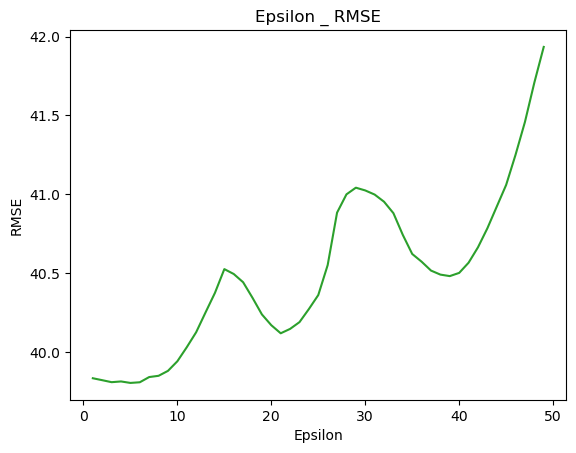

In [46]:
epsilons = np.arange(1,50)
scores = []
for e in epsilons:
    svr.set_params(epsilon=e)
    svr.fit(train_X, train_Y.ravel())
    scores.append(math.sqrt(mean_squared_error(val_Y, svr.predict(val_X))))
plt.plot(epsilons, scores, color ='tab:green')
plt.title("Epsilon _ RMSE")
plt.xlabel("Epsilon")
plt.ylabel("RMSE")
plt.show()

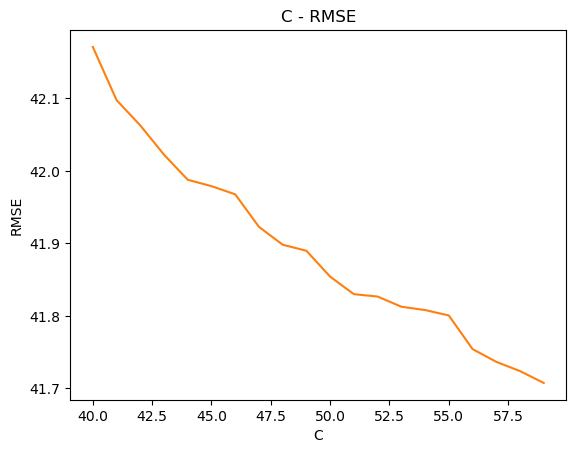

In [45]:
# Try to get the lowest RMSE by using different C value with Epsilon value above, then retrain the model again above
svr.set_params(epsilon=48)
Cs = np.arange(40,60)
scores = []
for c in Cs:
    svr.set_params(C=c)
    svr.fit(train_X, train_Y.ravel())
    scores.append(math.sqrt(mean_squared_error(val_Y, svr.predict(val_X))))
plt.plot(Cs, scores, color ='tab:orange')
plt.title("C - RMSE")
plt.xlabel("C")
plt.ylabel("RMSE")
plt.show()